# === Design ===

## 706. Design HashMap
[706. Design HashMap](https://leetcode.com/problems/design-hashmap/)

In [56]:
class Bucket:
    def __init__(self):
        self.bucket = []

    def get(self, key):
        for (k, v) in self.bucket:
            if k == key:
                return v
        return -1

    def update(self, key, value):
        found = False
        for i, kv in enumerate(self.bucket):
            if key == kv[0]:
                self.bucket[i] = (key, value)
                found = True
                break

        if not found:
            self.bucket.append((key, value))

    def remove(self, key):
        for i, kv in enumerate(self.bucket):
            if key == kv[0]:
                del self.bucket[i]


class MyHashMap(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        # better to be a prime number, less collision
        self.key_space = 2069
        self.hash_table = [Bucket() for i in range(self.key_space)]


    def put(self, key, value):
        """
        value will always be non-negative.
        :type key: int
        :type value: int
        :rtype: None
        """
        hash_key = key % self.key_space
        self.hash_table[hash_key].update(key, value)


    def get(self, key):
        """
        Returns the value to which the specified key is mapped, or -1 if this map contains no mapping for the key
        :type key: int
        :rtype: int
        """
        hash_key = key % self.key_space
        return self.hash_table[hash_key].get(key)


    def remove(self, key):
        """
        Removes the mapping of the specified value key if this map contains a mapping for the key
        :type key: int
        :rtype: None
        """
        hash_key = key % self.key_space
        self.hash_table[hash_key].remove(key)

# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)

## *** 155. Min Stack
[155. Min Stack](https://leetcode.com/problems/min-stack/)

- O(n) --> O(1)

In [1]:
class MinStack:
    """
    Keep track of the current minimum val
    Use a stack to save the pair([val, cur_min])
    """

    def __init__(self):
        self.stack = deque()
        self.cur_min = float('inf')
        

    def push(self, val: int) -> None:
        # Wh
        self.cur_min = min(val, self.cur_min)
        self.stack.append([val, self.cur_min])
        

    def pop(self) -> None:
        self.stack.pop()

    def top(self) -> int:
        return self.stack[-1][0]

    def getMin(self) -> int:
        return self.stack[-1][1]

## 146. LRU Cache
[146. LRU Cache](https://leetcode.com/problems/lru-cache/)

```
算法题 设计历史记录
插入新记录时要删除原来旧的。比如原来是12345，现在插入3，结果是12453
follow up：
内存有限制怎么办？持久化一部分，或者设置内存的limit: set capacity
达到内存限制怎么办？淘汰最旧的记录: remove the least recent used record
这道题其实就是LRU cache的变种
```

- HM: 条件是数据非常大million级一次性输入然后给返回 mapreduce

In [57]:
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.prev = self.next = None

class LRUCache(object):
    """
    cache: <key: val, val: Node>
    doubly linkedlist: left and right dummy node
                       left = LRU, right = most recent
    """

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        self.cap = capacity
        self.cache = {} 
        
        # left = LRU, right = most recent
        self.left, self.right = Node(0, 0), Node(0, 0)
        self.left.next, self.right.prev = self.right, self.left

    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        if key in self.cache:
            # update to most recent place
            self.remove(self.cache[key])
            self.insert(self.cache[key])
            # nothing need to change in dict
            return self.cache[key].val
        return -1
        

    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: None
        """
        # remove first
        if key in self.cache:
            self.remove(self.cache[key])
        # insert the updated node
        self.cache[key] = Node(key, value)
        self.insert(self.cache[key])
        
        if len(self.cache) > self.cap:
            # remove from the linkedlist
            lru = self.left.next
            self.remove(lru)
            # delete the LRU from the dict
            del self.cache[lru.key]
    
    # remove the node from the linkedlist
    def remove(self, node):
        prev, nxt = node.prev, node.next
        prev.next, nxt.prev = nxt, prev

    # insert the node at right
    def insert(self, node):
        prev, nxt = self.right.prev, self.right
        prev.next = node
        nxt.prev = node
        node.next, node.prev = nxt, prev

## 1472. Design Browser History
[1472. Design Browser History](https://leetcode.com/problems/design-browser-history/)

- 很多重复的url保持最后的访问顺序 LRU

In [4]:
# Solution 1: two stacks (better)
class BrowserHistory:
    """
    two stack to keep track of the dependency of previous and next pages
    
    homepage: b
    stack previous [ a 
    stack next [ c
    
    # !!! when visiting a new page, no next url exist
    
    Time: O(constant) --> O(1)
    Space: O(n) --> previous + next
    """

    def __init__(self, homepage: str):
        self.curpage = homepage
        self.previous = deque()
        self.next = deque()

    def visit(self, url: str) -> None:
        self.previous.append(self.curpage)
        self.curpage = url
        # !!! when visiting a new page, no next url exist
        self.next.clear()

    def back(self, steps: int) -> str:
        while self.previous and steps > 0:
            self.next.append(self.curpage)
            self.curpage = self.previous.pop()
            steps -= 1
        return self.curpage

    def forward(self, steps: int) -> str:
        while self.next and steps > 0:
            self.previous.append(self.curpage)
            self.curpage = self.next.pop()
            steps -= 1
        return self.curpage
        

In [2]:
# Solution 2: Doubly Linkedlist
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None
        self.prev = None
        
class BrowserHistory:

    def __init__(self, homepage: str):
        self.root = ListNode(homepage)

    def visit(self, url: str) -> None:
        node = ListNode(url)
        node.prev = self.root
        self.root.next = node
        self.root = self.root.next

    def back(self, steps: int) -> str:
        while(steps and self.root.prev):
            self.root = self.root.prev
            steps -= 1
        return self.root.val

    def forward(self, steps: int) -> str:
        while(steps and self.root.next):
            self.root = self.root.next
            steps -= 1
        return self.root.val

## 1396. Design Underground System
[1396. Design Underground System](https://leetcode.com/problems/design-underground-system/)

In [ ]:
from collections import defaultdict

class UndergroundSystem:
    """
    1. Clarify:
        assue all operations are valid
    2. Idea
        1) use a dict to store check-in info: 
            check_in: dict(key: id, val:(startStation, time))
        2) use another hashmap to store info to maintain travel times between two stations
            trip: dict(key:(start, end), val: [total_time, cur_count])
    
    Time: O(1)
    Space: O(num_P + S^2)
    """

    def __init__(self):
        # use a dict to store check-in info 
        # check_in: dict(key: id, val:(startStation, time))
        self.check_in_dict = {}
        
        # use another hashmap to store info to maintain travel times between two stations
        # trip: dict(key:(start, end), val: [total_time, cur_count])
        self.trip_dict = defaultdict(lambda: [0, 0])

    def checkIn(self, id: int, stationName: str, t: int) -> None:
        self.check_in_dict[id] = (stationName, t)
        

    def checkOut(self, id: int, stationName: str, t: int) -> None:
        # look up the id in check_in_dict and transfer the data to trip_dict
        start_station, start_time = self.check_in_dict.pop(id)
        self.trip_dict[(start_station, stationName)][0] += t - start_time
        self.trip_dict[(start_station, stationName)][1] += 1
        

    def getAverageTime(self, startStation: str, endStation: str) -> float:
        total_time, total_count = self.trip_dict[(startStation, endStation)]
        return total_time / total_count

In [6]:
from collections import defaultdict
a = defaultdict(lambda: [0, 0])
a['cc'] = [1,1]
print(a)

defaultdict(<function <lambda> at 0x7f849de09670>, {'cc': [1, 1]})


## 1656. Design an Ordered Stream
[1656. Design an Ordered Stream](https://leetcode.com/problems/design-an-ordered-stream/)

- 优化一下space， 从list换成dic 就好
- 如果insert的顺序基本都是连续的话怎么能特判一下提高效率

In [2]:
"""
Basically , we need to store every incoming value at the given index. And
with every incoming index, we have to check

If the current index is less than the incoming index, the we have to return
an empty list

Else , we have to return an sliced list from the incoming index to the first index
where there is no insertion till yet.

Solution:
    Initialize a list of size n with None
    Maintain the current index with self.ptr
    For every insert call, with idKey, value
    Assign the list[idKey-1] to the value # Since array is 0-index reduce 1
    Check if the current index is less than incoming index(idKey-1) and return []
    Else return sliced list from incoming index(idKey-1) till we do not encounter None.
"""

class OrderedStream:
    def __init__(self, n: int):
        self.stream = [None for _ in range(n)]
        self.ptr = 0
        
    def insert(self, idKey: int, value: str):
        idKey -= 1
        self.stream[idKey] = value
        if self.ptr < idKey:
            return []
        else:
            while self.ptr < len(self.stream) and self.stream[self.ptr] is not None:
                self.ptr += 1
            return self.stream[idKey:self.ptr]

# Your OrderedStream object will be instantiated and called as such:
# obj = OrderedStream(n)
# param_1 = obj.insert(idKey,value)

## *** 380. Insert Delete GetRandom O(1)
[380. Insert Delete GetRandom O(1)](https://leetcode.com/problems/insert-delete-getrandom-o1/)

- Lottery System
- 1. duplicate的话怎么办，2. 多线程的话怎么办 （不需要写code，但一直在讨论怎么优化）

In [54]:
from random import randint, choice

a = [1,2,3]
b = choice(a)
c = randint(0,2)
c

0

In [16]:
from random import choice
class RandomizedSet:
    """
    rand_list: store all the vals in sequence of address to applying probability uniformly
    dict: <key: element val: index of rand_list>
    """

    def __init__(self):
        self.rand_list = []
        self.ele_idx = {}

    def insert(self, val: int) -> bool:
        if val in self.ele_idx:
            return False
        self.ele_idx[val] = len(self.rand_list)
        self.rand_list.append(val)
        return True

    def remove(self, val: int) -> bool:
        if val not in self.ele_idx:
            return False
        
        # find the last element
        last_ele = self.rand_list[-1]
        # find the idx of delete ele
        del_idx = self.ele_idx[val]
        
        # dict
        # update the last_ele
        self.ele_idx[last_ele] = del_idx
        # delete val
        self.ele_idx.pop(val)
        
        # list
        # self.rand_list[-1], self.rand_list[del_idx] = self.rand_list[del_idx], self.rand_list[-1]
        self.rand_list[del_idx] = last_ele
        self.rand_list.pop()
        return True

    def getRandom(self) -> int:
        return choice(self.rand_list)

## 381. Insert Delete GetRandom O(1) - Duplicates allowed
[381. Insert Delete GetRandom O(1) - Duplicates allowed](https://leetcode.com/problems/insert-delete-getrandom-o1-duplicates-allowed/)

In [59]:
from collections import defaultdict
from random import choice

class RandomizedCollection:
    """
    rand_list: store all the vals in sequence of address to applying probability uniformly
    dict: <key: element val: set(element_index)>
    !!! Remove a random item from the set
    """

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.lst = []
        self.idx = defaultdict(set)


    def insert(self, val: int) -> bool:
        """
        Inserts a value to the collection. Returns true if the collection did not already contain the specified element.
        """
        self.idx[val].add(len(self.lst))
        self.lst.append(val)
        return len(self.idx[val]) == 1


    def remove(self, val: int) -> bool:
        """
        Removes a value from the collection. Returns true if the collection contained the specified element.
        """
        if not self.idx[val]: return False
        remove, last = self.idx[val].pop(), self.lst[-1]
        self.lst[remove] = last
        self.idx[last].add(remove)
        self.idx[last].discard(len(self.lst) - 1)

        self.lst.pop()
        return True


    def getRandom(self) -> int:
        """
        Get a random element from the collection.
        """
        return choice(self.lst)


## *** 1244. Design A Leaderboard
[1244. Design A Leaderboard](https://leetcode.com/problems/design-a-leaderboard/)

```
follow up: 会问多次请求如何处理
我的理解是如果addScore请求较多就让addScore TC低一些，就maintain一个array每次addScore constant，如果top请求较多就让top TC低一些，就maintain一个heap每次top稳定klogn
```

## 就是码头，传进来的是货物有不同公司和大小， 然后传进来对应的公司ticket， 大小就要进行增加，还有topK
ticket - volumn:
    add(String ticket, int volumn)
    List<String> topK(), 用hashmap 实现,  
    follow up， 如果使用topk远大于 add，并且还要求能根据ticket查找volumn怎么办，  我是说添加一个linkedlist， 每次添加重新排序

一个hashmap加一个treemap, 可以保证add是O(logN), topK是O(k)

- 换了题目的背景，并且最后返回的不是sum，是返回所有的playerId

In [3]:
from collections import defaultdict
import heapq
class Leaderboard:
    # SC = O(N + K) dict + heap

    def __init__(self):
        self.scores = defaultdict(int)

    # TC = O(1)
    def addScore(self, playerId: int, score: int) -> None:
        self.scores[playerId] += score
        
    # TC = K (heapify) + (N - K)logK(pop) + KlogK(add up)
    def top(self, K: int) -> int:
        minHeap = []
        for x in self.scores.values():
            heapq.heappush(minHeap, x)
            if len(minHeap) > K:
                heapq.heappop(minHeap)
        # add top k
        total = 0
        while minHeap:
            total += heapq.heappop(minHeap)
        return total
        
    # TC = O(1)
    def reset(self, playerId: int) -> None:
        self.scores[playerId] = 0

## 怎么design扑克牌和deck（用花色和rank来区分不同牌）最后简单问了问hashmap是怎么implement的
- 编写程序，设计单张扑克牌类Card，具有花色，牌面与具体值。同时设计整副扑克牌类Cards，具有52张牌。红桃、黑桃、方片、草花 2345678910JQKA

[solution](https://medium.com/@anthonytapias/build-a-deck-of-cards-with-oo-python-c41913a744d3)

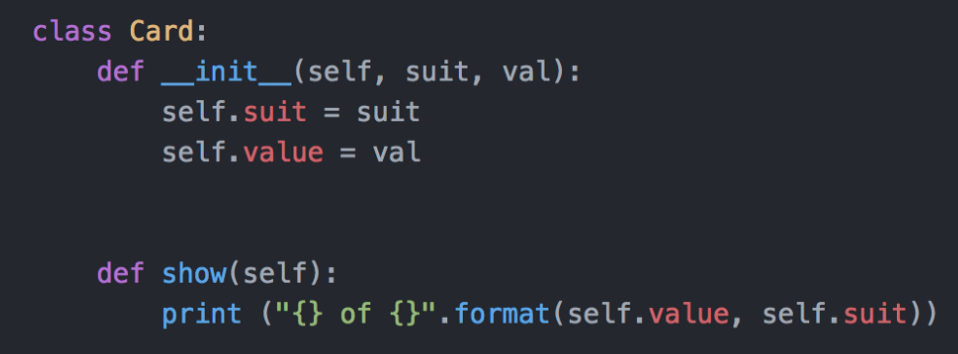

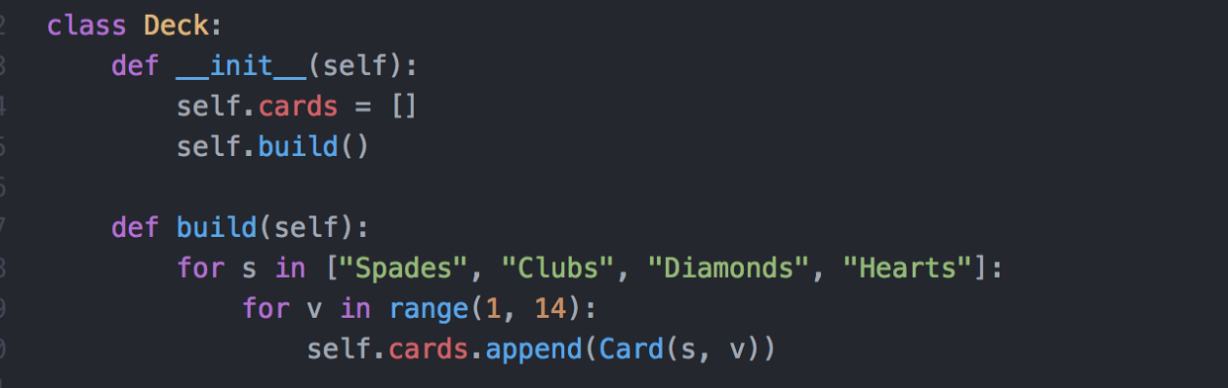

# === Array/String ===

## ++++ Binary Search +++

## 852. Peak Index in a Mountain Array
[852. Peak Index in a Mountain Array](https://leetcode.com/problems/peak-index-in-a-mountain-array/)

In [17]:
class Solution:
    def peakIndexInMountainArray(self, arr) -> int:
        """
        0 1 2 3 4 5 6 7
        0 2 4 6 10 5 2 1
        l
                       r
              m
        in the mountain array [1, 2, 3, 4, 1], the comparisons A[i] < A[i+1] would be True, True, True, False.

        We can find the largest index i such that A[i] < A[i+1]。 A[i + 1] is the peak
        """
        n = len(arr)
        l = 0
        r = n - 1
        while l < r:
            mid = l + (r - l) // 2
            if arr[mid] < arr[mid + 1]:
                l = mid + 1
            else:
                # r might be the peak
                r = mid
        return l

In [3]:
def findMin(arr):
    """
    寻找一个数列的最小值，可能是单增，单减，也可能是v型
        前面数组前面半截是逆序
        没有倒v这种情况

    5 4 3 2 1 8 10 11
    l
                    r
          mid
    if arr[mid] > arr[mid+1]:
        l = mid + 1
    else:
        r = mid
    """
    n = len(arr)
    l = 0
    r = n - 1
    while l < r:
        mid = l + (r - l) // 2
        if arr[mid] > arr[mid + 1]:
            l = mid + 1
        else:
            r = mid
    return l

arr1 = [5,4,3,2,1]
arr2 = [1,2,3,4,5]
arr3 = [5,4,3,2,1,8,10]
# print(findMin(arr1))
# print(findMin(arr2))
# print(findMin(arr3))

## 153. Find Minimum in Rotated Sorted Array
[153. Find Minimum in Rotated Sorted Array](https://leetcode.com/problems/find-minimum-in-rotated-sorted-array/)


- Follow up: 寻找一个数列的最小值，可能是单增，单减，也可能是v型
    - 前面数组前面半截是逆序
    - 没有倒v这种情况

In [8]:
class Solution:
    def findMin(self, nums) -> int:
        """
        
        case1: no rotation
        1 2 3 4 5 6 7   l < r: return l
        l
                    r
        
        case 2:
        0 1 2 3 4 5 6 7  mid > mid + 1: return mid + 1
        4 5 6 7 | 0 1 2
        l
                      r
              m          
       
        Goal: find the cliff point
        1. Find the mid element of the array.

        2. If mid element > first element :look for the cliff point on the right of mid.

            If mid element < first element :look for the cliff point on the left of mid.
        
        3. We stop our search when we find the inflection point, when either of the two conditions is satisfied:

            nums[mid] > nums[mid + 1] Hence, mid+1 is the smallest.

            nums[mid - 1] > nums[mid] Hence, mid is the smallest.
        
        Time: O(logn)
        Space: O(1)
              
        """
        n = len(nums)
        left = 0
        right = n - 1
        # corner case:
        if n == 1:
            return nums[0]
        if nums[left] < nums[right]:
            return nums[left]
        
        # binary search
        while left <= right:
            mid = left + (right - left) // 2
            if mid < n - 1 and nums[mid] > nums[mid + 1]:
                return nums[mid + 1]
            if mid > 0 and nums[mid - 1] > nums[mid]:
                return nums[mid]
            
            # left sorted
            if nums[mid] > nums[left]:
                left = mid + 1
            else:
                right = mid - 1

## 154. Find Minimum in Rotated Sorted Array II
[154. Find Minimum in Rotated Sorted Array II](https://leetcode.com/problems/find-minimum-in-rotated-sorted-array-ii/)

In [10]:
# Time: O(n)
# Space: O(1)
class Solution:
    def findMin(self, nums) -> int:
        left = 0
        right = len(nums) - 1
        
        while left < right:
            mid = left + (right - left) // 2
            if nums[left] == nums[mid] == nums[right]:
                left += 1
                right -= 1
            # mid might be the minimum value
            elif nums[mid] <= nums[right]:
                right = mid
            else:
                left = mid + 1

        # cover only one element case
        return nums[left]

## 33. Search in Rotated Sorted Array
[33. Search in Rotated Sorted Array](https://leetcode.com/problems/search-in-rotated-sorted-array/)

In [5]:
class Solution:
    def search(self, nums, target: int) -> int:
        """
                   mid
        case 1: 4 5 6 7 0 1 2 --> left sorted
        case 2: 5 6 0 1 2 3 4 --> right sorted
        
        the subarray is either left sorted or right sorted
        we can determine if the target within the sorted part or not to tight the bound
        
        left sorted: 
            nums[left] <= target < nums[mid]: go left 
            else go right
        rigth sorted: 
            nums[mid] < target <= nums[right: go right
            else go left
        
        """
        n = len(nums)
        left = 0
        right = n - 1
        while left <= right:
            mid = left + (right - left) // 2
            if nums[mid] == target:
                return mid
            
            # left sorted
            if nums[left] <= nums[mid]: # [3,1] target = 1  handle 2 elements case
                # target in the left side
                if nums[left] <= target < nums[mid]:
                    # go left
                    right = mid - 1
                else:
                    # go right
                    left = mid + 1
            # right sorted
            else:
                # target in the right side
                if nums[mid] < target <= nums[right]:
                    # go right
                    left = mid + 1
                else:
                    right = mid - 1
                
        return -1

## 81. Search in Rotated Sorted Array II
[81. Search in Rotated Sorted Array II](https://leetcode.com/problems/search-in-rotated-sorted-array-ii/)

In [7]:
class Solution:
    def search(self, nums, target: int) -> bool:
        """
        only difference: avoid duplicates
        
        Time: worse case all numbers are the same O(n)
        Space: O(1)
        """
        n = len(nums)
        left = 0
        right = n - 1
        
        while left <= right:
            # avoid duplicates
            while left < right and nums[left] == nums[left + 1]:
                left += 1
            while left < right and nums[right] == nums[right - 1]:
                right -= 1
            
            # binary search
            mid = left + (right - left) // 2
            if nums[mid] == target:
                return True
            # left sorted
            if nums[mid] >= nums[left]:
                if nums[left] <= target < nums[mid]:
                    # go left
                    right = mid - 1
                else:
                    left = mid + 1
            else:
            # right sorted
                if nums[mid] < target <= nums[right]:
                    # go right
                    left = mid + 1
                else:
                    right = mid - 1
        return False

### 找一个b list比a list大的数量，但用two for loops不行，要用二分法提升Time Complexity

## ++++ Prefix Sum +++

## 238. Product of Array Except Self
[238. Product of Array Except Self](https://leetcode.com/problems/product-of-array-except-self/)

In [11]:
class Solution:
    def productExceptSelf(self, nums):
        """
        uodate the answer inplace
        """
        n = len(nums)
        answer = [0]*n
        
        # answer[i] contains the product of all the elements to the left
        # Note: for the element at index '0', there are no elements to the left,
        # so the answer[0] would be 1
        answer[0] = 1
        for i in range(1, n):
            # answer[i - 1] already contains the product of elements to the left of 'i - 1'
            # Simply multiplying it with nums[i - 1] would give the product of all 
            # elements to the left of index 'i'
            answer[i] = nums[i - 1] * answer[i - 1]
        
        # R contains the product of all the elements to the right
        # Note: for the element at index 'length - 1', there are no elements to the right,
        # so the R would be 1
        R = 1;
        for i in reversed(range(n)):        
            # For the index 'i', R would contain the 
            # product of all elements to the right. We update R accordingly
            answer[i] = answer[i] * R
            R *= nums[i]
        
        return answer

In [10]:
a = [1, 2, 3]
for i in reversed(range(len(a))):
    print(a[i])

3
2
1


In [9]:
# Solution 1: TC = O(n) SC = O(n)
class Solution:
    def productExceptSelf(self, nums):
        """
        res[i] = mul(nums[0: i]) * mul(nums[i + 1:])
        
          1   2 3 4
    left  1   1 2 6
    right 24 12 4 1
        """
        n = len(nums)
        left = [1 for _ in range(n)]
        for i in range(1, n):
            left[i] = left[i - 1] * nums[i - 1]
        
        right = [1 for _ in range(n)]
        for i in range(n - 2, -1, -1):
            right[i] = right[i + 1] * nums[i + 1]
        
        res = [1 for _ in range(n)]
        for i in range(n):
            res[i] = left[i] * right[i]
        return res

## *** 128. Longest Consecutive Sequence
[128. Longest Consecutive Sequence](https://leetcode.com/problems/longest-consecutive-sequence/)
- 套扑克牌的，5个则是顺子
- 就是幺二八套一个扑克牌的外壳，input是234JQKA这种，能连续数5个就是顺子
- input String: JQKA235

In [9]:
class Solution:
    def longestConsecutive(self, nums) -> int:
        """
        100,4,200,1,3,2
        i
        
        1 2 3 4 5
        
        5 4 3 2 1
                j
          
        1. Brute force --> O(n^3)
        2. 2 changes --> O(n)
        """
        if not nums:
            return 0
        num_set = set(nums)
        global_max = 0
        
        for num in num_set:
            # avoid duplicate calculation
            # start at a 断崖
            if num - 1 not in num_set:
                cur_num = num
                cur_max = 1
                while cur_num + 1 in num_set:
                    cur_num += 1
                    cur_max  += 1
                global_max = max(global_max, cur_max)
        return global_max

## ++++ Sliding Window +++

## 3. Longest Substring Without Repeating Characters
[3. Longest Substring Without Repeating Characters](https://leetcode.com/problems/longest-substring-without-repeating-characters/)

- 最坏情况的最好情况: best: non-repeating worse: all-repeating

In [10]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        """
        abcabcbb
        i
          j
        abcdefgg
        i
              j
        
        [i, j] current longest substring witout rep chars
        max: global_max = 1
        set[a b c
        
        TC = O(n)
        SC = O(n)
        """
        n = len(s)
        if n <= 1:
            return n
        dup = set()
        l = 0
        global_max = 0
        for r in range(n):
            while s[r] in dup:
                # shrink left
                dup.remove(s[l])
                l += 1
            # satisfy
            global_max = max(global_max, r - l + 1)
            # add current
            dup.add(s[r])
        return global_max

## ++++ Two Pointers +++

## 283. Move Zeroes
[283. Move Zeroes](https://leetcode.com/problems/move-zeroes/)

In [2]:
class Solution:
    def moveZeroes(self, nums) -> None:
        """
        Do not return anything, modify nums in-place instead.
        
        1 3 12 0 0
          i
                 j
        [0, i) non-zero
        j: current element
        (j, n] zero
        """
        i = 0
        j = 0
        while j < len(nums):
            if nums[j] != 0:
                nums[i], nums[j] = nums[j], nums[i]
                i += 1
            j += 1

## 1209. Remove All Adjacent Duplicates in String II
[1209. Remove All Adjacent Duplicates in String II](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string-ii/)

- 变种亿儿零酒，不是给定的k长度，是所有大于等于k长度的都要删掉，follow up如何优化：时间上已经是O（n)了只能propose空间，问了可不可以只用一个counter来update出现的次数，并没有让implement。

In [61]:
class Solution:
    def removeDuplicates(self, s: str, k: int) -> str:
        arr = list(s)
        # stack contians the number of elememts
        stack = deque()
        # initial
        stack.append(1)
        # two pointers
        # [0, i) keep
        # j: is processing
        i = 1
        j = 1
        while j < len(arr):
            if i == 0 or arr[i - 1] != arr[j]:
                arr[i] = arr[j]
                stack.append(1)
            else:
                count = stack.pop() + 1
                if count == k:
                    # remove
                    i = i - k
                else:
                    arr[i] = arr[j]
                    stack.append(count)
            i += 1
            j += 1
        return "".join(arr[: i])

## 1. Two Sum
[1. Two Sum](https://leetcode.com/problems/two-sum/)
- 变种 ： two sum变形，find how many pairs‍‌‍‌‌‍‌‍‍‍‌‍‍‍‌‌‌‌‌ (of 2 elements) in an array sum up to the target value，
- sorted? duplicates?

[!!!! 强化冲刺 class02](https://docs.google.com/document/d/1wZ6Qi1Xcv2a11FtCCW8oFKj0CWc93lcW8-VyD9ZdntU/edit#)

## Two Sum in pairs

## 15. 3Sum
[15. 3Sum](https://leetcode.com/problems/3sum/)

In [63]:
class Solution:
    def threeSum(self, nums):
        # self.res = set()
        self.res = []
        nums.sort()
        n = len(nums)
        for i in range(n - 2):
            if nums[i] > 0:
                break
            if i == 0 or nums[i] != nums[i - 1]:
                self.twoSum(nums, nums[i], i + 1, n - 1)
        return self.res
    
    def twoSum(self, nums, i_sum, l, r):
        while l < r:
            cur_sum = nums[l] + nums[r]
            if cur_sum == -1 * i_sum:
                # self.res.add((i_sum, nums[l], nums[r]))
                self.res.append([i_sum, nums[l], nums[r]])
                l += 1
                while l < r and nums[l] == nums[l - 1]:
                    l += 1
                r -= 1
                while l < r and nums[r] == nums[r + 1]:
                    r -= 1
            elif cur_sum < -1 * i_sum:
                l += 1
            else:
                r -= 1

## 394. Decode String
[394. Decode String](https://leetcode.com/problems/decode-string/)

In [65]:
# Two stacks
class Solution:
    def decodeString(self, s: str) -> str:
        countStack = deque()
        strStack = deque()
        curStr = ''
        k = 0
        
        for c in s:
            if c.isdigit():
                k = k * 10 + int(c)
            elif c == '[':
                # push number k into countStack
                countStack.append(k)
                # push curStr to strStack
                strStack.append(curStr)
                # reset k and curStr
                k = 0
                curStr = ''
            elif c == ']':
                decode_str = strStack.pop() + countStack.pop() * curStr
                curStr = decode_str
            else:
                curStr += c
        return curStr

## 271. Encode and Decode Strings
[271. Encode and Decode Strings](https://leetcode.com/problems/encode-and-decode-strings/)
- 他会先问如果字符串只带字母怎么做，然后再问如果字符串涵盖所有字符怎么设计

## 1790. Check if One String Swap Can Make Strings Equal
[1790. Check if One String Swap Can Make Strings Equal](https://leetcode.com/problems/check-if-one-string-swap-can-make-strings-equal/)

- 判断两个string，如果 只做一次swap ，是否可以变的一样

In [1]:
class Solution:
    def areAlmostEqual(self, s1: str, s2: str) -> bool:
        if s1 == s2:
            return True
        pairs = []
        for i in range(len(s1)):
            if s1[i] != s2[i]:
                # record the mismatch chars in pair
                pairs.append([s1[i], s2[i]])
        # check if only one swap could make two stirng equal
        if len(pairs) == 2:
            if pairs[0][0] == pairs[1][1] and pairs[0][1] == pairs[1][0]:
                return True
        return False

## 611. Valid Triangle Number
[611. Valid Triangle Number](https://leetcode.com/problems/valid-triangle-number/)

In [66]:
class Solution(object):
    def triangleNumber(self, nums):
        """
        a + b > c
        b + c > a
        a + c > b
        
        if we sort the array
        we can get a < b < c, thus it satisfy b + c > a and a + c > b
        we only need to check a + b > c
        
        eg: 
        1. sort the input first
        2. iterate the input in reverse order
           fix c as the input[i], we need to find all pairs in [0, i-1]
        3.
        fix end, if start + end > c, than all the elements larger than start + end > c
        for example: 
        2 + 4 > 5
        3 + 4 > 5
        
        2 3 4 5
              c
        s
            e
        """
        nums.sort()
        ans = 0
        L = len(nums)
        # c < (a+b)
        for i in range(L-1,1,-1):
            c = nums[i]
            start = 0
            end = i-1
            while start < end:
                if nums[start] + nums[end] > c:
                    ans += end - start
                    end -= 1
                elif nums[start] + nums[end] <= c:
                    start += 1
        return ans

## 443. String Compression
[443. String Compression](https://leetcode.com/problems/string-compression/)

In [68]:
class Solution:
    def compress(self, chars) -> int:
        """
         a a a a b b b b d d d d 
           i
                 j'
         j
         
         [0, i)  keep
         [j, j'] same letters
         if j' - j = 1
         else:
            while j' - j -> tostring -> append one by one
        """
        i = 0
        j = 0
        k = 0
        n = len(chars)
        while k < n:
            while k < n and chars[k] == chars[j]:
                k += 1
            count = k - j
            chars[i] = chars[j]
            i += 1
            # check the count and append to i position
            if count > 1:
                for ch in str(count):
                    chars[i] = ch
                    i += 1
            # move j
            j = k
        return i

## 723. Candy Crush
[723. Candy Crush](https://leetcode.com/problems/candy-crush/)

- Time complexity analysis explanation: Suppose there are R rows and C Columns. Then the number of vertical repetitions of length 3 we can crush are R/3 per column * C columns. The number of horizontal repetitions of length 3 we can crush are C/3 per row * R rows. Each crushing session takes O (R * C) time so we have O((R * C * R/3 * C) + (RCC/3R)) = O(R^2C^2/3 + R^2C^2/3) = O(R^2C^2).
- Space: O(1)

In [7]:
class Solution(object):
    def candyCrush(self, board):
        return self.cursh(board) if todo else board
    
    # one candy crush
    def crush(self, board):
        R = len(board)
        C = len(board[0])
        # flag to check if we need to recursivly call candy crush functions
        todo = False

        # mark same elements in the same row
        for r in range(R):
            for c in range(C-2):
                if abs(board[r][c]) == abs(board[r][c+1]) == abs(board[r][c+2]) != 0:
                    board[r][c] = board[r][c+1] = board[r][c+2] = -abs(board[r][c])
                    todo = True

        # mark same elements in the same col
        for r in range(R-2):
            for c in range(C):
                if abs(board[r][c]) == abs(board[r+1][c]) == abs(board[r+2][c]) != 0:
                    board[r][c] = board[r+1][c] = board[r+2][c] = -abs(board[r][c])
                    todo = True

        """
        elements drop
        start at the bottom of the row
            if not candy:
                copy wr --
            if it's candy:
                skip
        """
        for c in range(C):
            wr = R-1
            # fill drop elements
            for r in range(R-1, -1, -1):
                if board[r][c] > 0:
                    board[wr][c] = board[r][c]
                    wr -= 1
            # fill top cells to 0
            for wr in range(wr, -1, -1):
                board[wr][c] = 0

## ++++  Intervals +++

## 253. Meeting Rooms II
[253. Meeting Rooms II](https://leetcode.com/problems/meeting-rooms-ii/)
-  follow up是 如果要返回最大重叠的meetingroom怎么整
- 某时刻meeting room如何计算
[C++ follow up](https://www.1point3acres.com/bbs/thread-923941-1-1.html)

In [2]:
class Solution:
    def minMeetingRooms(self, intervals) -> int: 
        """
        Minimum number of conference room --- maximium number of overlapping at the same time. 
        [[0,30], [5,10], [15,20]] 
        
        time stamp: 
        start time: +1 
        end time: -1 
        
        list: (time,number)
        0 +1; 30 -1; 5: +1; etc. 
        
        sort() 
        
        0   5    10    15    20    30 
        1   1     -1    1     -1    -1   
        
        arr = 1   2      1     2     1    0       
        
        max(arr) 
        time: n log (n) 
        space: O(n)  
        """   
        # dict time stamps
        time_stamps = []
        for start, end in intervals:
            # cover smae time stamps
            time_stamps.append((start, 1))
            time_stamps.append((end, -1))

        # sort
        time_stamps.sort()

        # calculate the accumulated sum and keep track of the global max
        global_max = 0
        cur_room = 0
        for time, val in time_stamps:
            cur_room += val
            global_max = max(global_max, cur_room)
        # return global max
        return global_max

## 759. Employee Free Time
[759. Employee Free Time](https://leetcode.com/problems/employee-free-time/)

简单来说就是 给定一个总体的time frame，然后再给你一个time interval的list 让你找出其中空出来的interval

In [4]:
# optmize by default dict (avoid same time stamps has not interval)
class Solution:
    def employeeFreeTime(self, schedule: '[[Interval]]') -> '[Interval]':
        """
        [[1,2],   [5,6]],
        [[1,  3]],
               [[4,       10]]
         2 -1 -1 1 1  -1   -1
         2  1  0 1 2  1     0
        
        accumulated sum == 0
        
        
        edge case:
                       [94,99]
        [57,87],[91,94]
        1    -1  1  -1
                         1  -1
        1    0   1   0   1   0
        """
        # time_stamps
        time_stamps = defaultdict(int)
        for cur in schedule:
            for s in cur:
                time_stamps[s.start] += 1
                time_stamps[s.end] -= 1
        # sort
        time_sort = sorted(time_stamps.keys())
        # accumulated sum
        cur_sum = 0
        res = []
        for i in range(len(time_sort) - 1):
            pre = time_sort[i]
            val = time_stamps[pre]
            cur_sum += val
            if cur_sum == 0:
                cur = time_sort[i + 1]
                res.append(Interval(pre, cur))
        return res

In [3]:
class Solution:
    def employeeFreeTime(self, schedule: '[[Interval]]') -> '[Interval]':
        """
        [[1,2],   [5,6]],
        [[1,  3]],
               [[4,       10]]
         2 -1 -1 1 1  -1   -1
         2  1  0 1 2  1     0
        
        accumulated sum == 0
        
        
        !! edge case:
                       [94,99]
        [57,87],[91,94]
        1    -1  1  -1
                         1  -1
        1    0   1   0   1   0
        """
        # time_stamps
        time_stamps = []
        for cur in schedule:
            for s in cur:
                time_stamps.append((s.start, 1))
                time_stamps.append((s.end, -1))
        # sort
        time_stamps.sort()
        # accumulated sum
        accumulated_sum = []
        cur_sum = 0
        for time, val in time_stamps:
            cur_sum += val
            accumulated_sum.append((time, cur_sum))
        # post processing
        res = []
        for i in range(len(accumulated_sum) - 1):
            pre = accumulated_sum[i]
            cur = accumulated_sum[i + 1]
            if pre[1] == 0 and pre[0] != cur[0]:
            # if pre[1] == 0:
                res.append(Interval(pre[0], cur[0]))
        return res

## 56. Merge Intervals
[56. Merge Intervals](https://leetcode.com/problems/merge-intervals/)

In [8]:
class Solution:
    def merge(self, intervals):
        """
        TC = O(nlogn)
        SC = O(n)
        
        sort by start time
        [1,3],[2,6],[8,10],[15,18]
        compare pair by pair
        case 1: cur start > previous end (not merge)
        case 2: cur start <= previous end (merge)
        """
        res = []
        n = len(intervals)
        intervals.sort()
        res.append(intervals[0])
        for i in range(1, n):
            cur = intervals[i]
            if cur[0] > res[-1][1]:
                # not merge
                res.append(cur)
            else:
                # merge
                res[-1] = [res[-1][0], max(res[-1][1], cur[1])]
        return res

## 986. Interval List Intersections
[986. Interval List Intersections](https://leetcode.com/problems/interval-list-intersections/)

In [9]:
# Solution 2: merge intervals
class Solution:
    def intervalIntersection(self, A, B):
        ans = []
        i = j = 0

        while i < len(A) and j < len(B):
            # Let's check if A[i] intersects B[j].
            # lo - the startpoint of the intersection
            # hi - the endpoint of the intersection
            lo = max(A[i][0], B[j][0])
            hi = min(A[i][1], B[j][1])
            if lo <= hi:
                ans.append([lo, hi])

            # Remove the interval with the smallest endpoint
            if A[i][1] < B[j][1]:
                i += 1
            else:
                j += 1

        return ans

In [6]:
# Solution 1: accummulated sum
# !!! edge case same time stamp one start one end
class Solution:
    def intervalIntersection(self, firstList, secondList):
        """
        [0,  2],  [5,10]
          [1,   5]
         1 1 -1 -1 1 -1
         1 2  1  0 1  0
        
        !!! edge case
        same time stamp: one is start, one is end
        """
        time_stamps = []
        for start, end in firstList:
            time_stamps.append((start, 1))
            time_stamps.append((end, -1))
        for start, end in secondList:
            time_stamps.append((start, 1))
            time_stamps.append((end, -1))
        # sort
        time_stamps.sort()
        # find the intervals with val 2
        cur_sum = 0
        res = []
        for i in range(len(time_stamps) - 1):
            pre = time_stamps[i]
            cur = time_stamps[i + 1]
            cur_sum += pre[1]
            if cur_sum == 2 or (pre[0] == cur[0] and pre[1] + cur[1] == 0):
                res.append((pre[0], cur[0]))
        return res

## 151. Reverse Words in a String
[151. Reverse Words in a String](https://leetcode.com/problems/reverse-words-in-a-string/)

In [70]:
class Solution:
    def reverseWords(self, s: str) -> str:
        s = list(" ".join(s.split()))
        
        # reverse all
        self.reverse(s, 0, len(s) - 1)
        
        # reverse each
        i = 0
        while i < len(s):
            j = i 
            while j < len(s) and s[j] != ' ':
                j += 1
            self.reverse(s, i, j - 1)
            i = j + 1
        return "".join(s)
    
    def reverse(self, s, i, j):
        while i < j:
            s[i], s[j] = s[j], s[i]
            i += 1
            j -= 1

## +++ Sorting +++

## 75. Sort Colors
[75. Sort Colors](https://leetcode.com/problems/sort-colors/)

- Quick sort (laioffer class2 sorting)

In [72]:
class Solution:
    def sortColors(self, nums) -> None:
        """
        Do not return anything, modify nums in-place instead.
        0,0,1,1,2,2
            i
                  j
                k
        [0, i) 0
        [i, j) 1
        j ->
        (k, n] 2
        """
        n = len(nums)
        if n <= 1:
            return
        i = 0
        j = 0
        k = n - 1
        while j <= k:
            if nums[j] == 0:
                nums[i], nums[j] = nums[j], nums[i]
                i += 1
                j += 1
            elif nums[j] == 1:
                j += 1
            else:
                nums[j], nums[k] = nums[k], nums[j]
                k -= 1
        return


# === Heap / PriorityQueue ===

# === HashTable ===

## 1347. Minimum Number of Steps to Make Two Strings Anagram
[1347. Minimum Number of Steps to Make Two Strings Anagram](https://leetcode.com/problems/minimum-number-of-steps-to-make-two-strings-anagram/)

In [2]:
class Solution:
    def minSteps(self, s: str, t: str) -> int:
        """
        1. calculate the char an it's count
            s leetcode -> {l:1, e:3, t:1, c:1, o:1, d:1}
            t practice -> {p:1, e:1, r:1, c:2, a:1, t:1, i:1}
        2. iterate over t:
            if ch in s:
                if s_count < t_count: need to modify the dif
                if s_count > t_count: offset the dif
           if ch not in s:
                modify ch
        """
        s_dict = Counter(s)
        t_dict = Counter(t)
        steps = 0
        for ch, count in t_dict.items():
            if ch in s_dict:
                dif = count - s_dict[ch]
                steps += dif if dif > 0 else 0
            else:
                steps += count
        return steps

## 1169. Invalid Transactions
[1169. Invalid Transactions](https://leetcode.com/problems/invalid-transactions/)

In [5]:
from collections import defaultdict
"""
Clarify:
    1. duplicate output
    
Solution:
        prev_tran = dict --> create a dic to keep track of previous transaction 
        invalid_tran = set --> to store invalid transaction /set to avoid duplication 
        
        Iterate over transactions:
            -> if the amount is greater than 1000 add it to the invalid_tran
            -> if there is any other previous transaction done by similar person , check it from the prev_tran
                    -> bring all previous transaction done by similar person (iterate over the prev_tran)
                            -> check if the absolute time difference is less than 60 and the city is different 
                            -> if that is true add it to the invalid transaction 
            -> add the transaction to the prev_tran - always keep track of previous transaction 
"""
class Solution:
    def invalidTransactions(self, transactions):
        if not transactions:
            return []
        prev_tran = defaultdict(list)
        invalid_tran = set()
        for i, tran in enumerate(transactions):
            cur_info = tran.split(',')
            # get info
            name, time, amount, city = cur_info[0], int(cur_info[1]), int(cur_info[2]), cur_info[3]
            # check amount
            if amount > 1000:
                invalid_tran.add((tran, i))
            # check same person transactions
            if name in prev_tran:
                for pre, idx in prev_tran[name]:
                    prev_info = pre.split(',')
                    prev_time = int(prev_info[1])
                    prev_city = prev_info[3]
                    if abs(prev_time - time) <= 60 and prev_city != city:
                        invalid_tran.add((pre,idx))
                        invalid_tran.add((tran, i))
            # add current transaction into pre_tran
            prev_tran[name].append((tran, i))
        return [ele[0] for ele in invalid_tran]
# TC = O(n^2)
# SC = O(n)

## 1636. Sort Array by Increasing Frequency
[1636. Sort Array by Increasing Frequency](https://leetcode.com/problems/sort-array-by-increasing-frequency/)

- hashmap implementation

## Predict next word的题。给出一堆sentences，作为数据样本，根据每个word的下一个word的出现频率，预测当前word的下一个word是什么。核心思想是用二维map来记录frequency来做查找

## Order list in welsh alphabetical order
[Order list in welsh alphabetical order](https://leetcode.com/discuss/interview-question/682583/bloomberg-phone-order-list-in-welsh-alphabetical-order)

# === Linkedlist ===

## 21. Merge Two Sorted Lists
[21. Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)

- 要求不能new 新的node，只能修改原来的next指针

In [77]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeTwoLists(self, list1, list2):
        dummyHead = ListNode(226)
        dummy = dummyHead
        while list1 and list2:
            if list1.val <= list2.val:
                dummy.next = list1
                list1 = list1.next
            else:
                dummy.next = list2
                list2 = list2.next 
            dummy = dummy.next
        # post
        if list1:
            dummy.next = list1
        if list2:
            dummy.next = list2
        return dummyHead.next

## 23. Merge k Sorted Lists
[23. Merge k Sorted Lists](https://leetcode.com/problems/merge-k-sorted-lists/)

In [78]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeKLists(self, lists):
        dummyHead = ListNode(226)
        dummy = dummyHead
        pointers = []
        heapq.heapify(pointers)
        
        for i in range(len(lists)):
            head = lists[i]
            if head:
                heapq.heappush(pointers, (head.val, i, head))
        
        while pointers:
            val, idx, node = heapq.heappop(pointers)
            dummy.next = node
            dummy = dummy.next
            # push the next pointer into heapq
            if node.next:
                heapq.heappush(pointers, (node.next.val, idx, node.next))
        return dummyHead.next

## 138. Copy List with Random Pointer
[138. Copy List with Random Pointer](https://leetcode.com/problems/copy-list-with-random-pointer/)

In [79]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if head is None:
            return None
        
        node_map = {}
        # initial
        newHead = Node(head.val)
        node_map[head] = newHead
        cur = head
        while cur:
            # create cur
            if cur not in node_map:
                node_map[cur] = Node(cur.val)
            cur = cur.next
        
        cur = head
        while cur:
            # copy next
            if cur.next:
                node_map[cur].next = node_map[cur.next]
            # copy random
            if cur.random:
                node_map[cur].random = node_map[cur.random]
            cur = cur.next
        return newHead

## 83. Remove Duplicates from Sorted List
[83. Remove Duplicates from Sorted List](https://leetcode.com/problems/remove-duplicates-from-sorted-list/)

In [1]:
class Solution:
    def deleteDuplicates(self, head):
        """
         [1,   1,1,2,3,3]
                  cur 
          res
        """
        if not head:
            return head
        cur = head
        while cur and cur.next:
            if cur.val == cur.next.val:
                cur.next = cur.next.next
            else:
                cur = cur.next
        return head

## 24. Swap Nodes in Pairs
[24. Swap Nodes in Pairs](https://leetcode.com/problems/swap-nodes-in-pairs/)

In [2]:
class Solution:
    """
        1 2 3 4
        newHead = head.next
        head.next.next = reverse(head.next.next)
    """
    def swapPairs(self, head):
        # base case
        if head is None or head.next is None:
            return head
        # recursive rule
        newHead = head.next
        head.next = self.swapPairs(head.next.next)
        newHead.next = head
        return newHead

## 2. Add Two Numbers
[2. Add Two Numbers](https://leetcode.com/problems/add-two-numbers/)

In [7]:
class Solution:
    def addTwoNumbers(self, l1, l2):
        """
         2 4 3 
               i
         5 6 4 8
                 j
 carry 0
         7 0 8 8
        """
        
        # Time = O(max(m, n))   m = len(l1)
        # Space = O(max(m, n))  n = len(l2)
        dummyHead = ListNode(226)
        dummy = dummyHead
        i = l1
        j = l2
        carry = 0
        while i or j or carry:
            l1_val = i.val if i else 0
            l2_val = j.val if j else 0
            # total sum
            cur_sum = l1_val + l2_val + carry
            # set cur_val and update carry
            carry = cur_sum // 10
            cur_val = cur_sum % 10
            dummy.next = ListNode(cur_val)
            dummy = dummy.next
            i = i.next if i else None
            j = j.next if j else None
        return dummyHead.next

## 445. Add Two Numbers II

[445. Add Two Numbers II](https://leetcode.com/problems/add-two-numbers-ii/)

In [6]:
class Solution:
    # TC = O(m + n)
    # SC = O(max(m, n))
    def addTwoNumbers(self, l1, l2):
        l1 = self.reverse(l1)
        l2 = self.reverse(l2)
        carry = 0
        dummyHead = ListNode(226)
        dummy = dummyHead
        while l1 or l2 or carry > 0:
            val1 = l1.val if l1 else 0
            val2 = l2.val if l2 else 0
            cur_sum = val1 + val2 + carry
            num = cur_sum % 10
            carry = cur_sum // 10
            dummy.next = ListNode(num)
            dummy = dummy.next
            
            l1 = l1.next if l1 else None
            l2 = l2.next if l2 else None
        return self.reverse(dummyHead.next)
            
        
    def reverse(self, head):
        if head is None or head.next is None:
            return head
        newHead = self.reverse(head.next)
        head.next.next = head
        head.next = None
        return newHead

## 430. Flatten a Multilevel Doubly Linked List
[430. Flatten a Multilevel Doubly Linked List](https://leetcode.com/problems/flatten-a-multilevel-doubly-linked-list/)

In [8]:
#    TC = O(n)
#    SC = O(n)
class Solution:
    def flatten(self, head: 'Optional[Node]') -> 'Optional[Node]':
        res = head
        self.helper(head)
        return res
    
    def helper(self, head):
        # base case
        if not head:
            return head
        # keep track of the previous pointer
        pre = head
        while head:
            # if current node has child, recursion
            if head.child:
                # get the tail of the sub-problem
                tail = self.helper(head.child)
                # connect child tail and next node
                tail.next = head.next
                if head.next:
                    head.next.prev = tail
                # connct child head to current node
                head.next, head.child.prev = head.child, head
                # update previous node
                pre = tail
                # set child pointer to None
                head.child = None
                # go to next node
                head = tail.next
            else:
                pre = head
                head = head.next
        return pre

In [3]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val, prev, next, child):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child
"""

class Solution:
    """
    TC = O(n)
    SC = O(n)
    1. iterate over the current level
    2. if cur node has child, recursion(keep track if the head and taill of subproblem)
    3. connect sub_problem node to cuurent level node
        
    """
    def flatten(self, head: 'Optional[Node]') -> 'Optional[Node]':
        return self.helper(head)[0]
    
    def helper(self, head):
        # base case
        if not head:
            return head, head
        # current level
        cur = head
        while cur:
            if not cur.child:
                cur = cur.next
            else:
                child_head, child_tail = self.helper(cur.child)
                # record next node
                next_node = cur.next
                if cur.next:
                    child_tail.next = next_node
                    next_node.prev = child_tail
                    
                cur.next = child_head
                child_head.prev = cur
                cur.child = None
                # next loop
                cur = next_node
        # record tail of current list
        tail = head
        while tail.next:
            tail = tail.next
        return head, tail

### print linked list(with next pointer to another linkedlist) level by level
```
1-> 2->3->9
|                  |
4->5->6     10-> 11
      |
      7->8
input: listnode(1)
output: print result [[1,2,3,9],[4,5,6, 10, 11],[7,8]]
```

# === Queue/Stack/Deque ===

## +++ Parentheses +++

## 1614. Maximum Nesting Depth of the Parentheses
[1614. Maximum Nesting Depth of the Parentheses](https://leetcode.com/problems/maximum-nesting-depth-of-the-parentheses/)

- follow up: keep track of index using map, not use stack
```
應該是說題目跟1614很像，也是找出max depth，然後要 return 所有 等於 max depth 的 字串
我是用 stack 存了 index ，follow up 考官說可以用 map 存就好
/*
Given a string that may contain brackets, and no unbalanced brackets, find the substring(s) within the most deeply nested balanced bracket(s).
"ab(c(d)e)" -> "d"
"[a{{b}c}d(e)]" -> "b"
"((a)b(cd)ef)"    ->  "a", "cd"
"(ab[]c){d{e}}"  ->  "", "e"
"Hello, World!"  ->  "Hello, World!"
The following sets of characters should be considered as open/close brackets respectively: ( ), [ ], { }
```

## 20. Valid Parentheses
[20. Valid Parentheses](https://leetcode.com/problems/valid-parentheses/)

In [7]:
# directly use a stack
# use a list to store 三种 parentheses
class Solution:
    def isValid(self, s: str) -> bool:
        bracket = ['(', ')', '{' ,'}' ,'[' ,']']
        stack = deque()
        for i in range (len(s)):
            index = bracket.index(s[i])
            if index % 2 == 0:
                # left
                stack.append(index)
            else:
                # right
                if not stack or stack[-1] != index - 1:
                    return False
                else:
                    stack.pop()
        return not stack

## +++ Duplicates +++

## 1D Candy Crush

In [6]:
def candy_crush(s, k):
    """
    stack: (char, count)
    0 1 2 3 4 5 6 7
    a a b b b a c d
              i
    
    i = 0 | stack = (a, 1)
    i = 1 | stack = (a, 2)
    i = 2 | stack = (a, 2) | (b, 1)
    i = 3 | stack = (a, 2) | (b, 2)
    i = 4 | stack = (a, 2) | (b, 3)
    i = 5 | stack = pop (b, 3) --> (a, 3)
    i = 6 | stack = pop (a, 3) --> (c, 1)
    i = 7 | stack = (c, 1) | (d, 1)

    """
    stack = []
    for i in range(len(s)):
        # check the top of stack 
        # cur char is the same as top char
        if stack and stack[-1][0]==s[i]:
            stack[-1][1] += 1
        else:
            # not same as stack top
            if stack and stack[-1][1]>=3:
                stack.pop()
            if stack and stack[-1][0]==candy[i]:
                stack[-1][1] += 1
            else:
                stack.append([candy[i], 1])
    # post processing
    if stack and stack[-1][1]>=3:
        stack.pop()
    return ''.join(char*freq for char, freq in stack)

## +++ Monotone Stack +++

## 84. Largest Rectangle in Histogram
[84. Largest Rectangle in Histogram](https://leetcode.com/problems/largest-rectangle-in-histogram/)

In [ ]:
class Solution:
    def largestRectangleArea(self, heights) -> int:
        """
        [-1,2,1,5,6,2,3,-1]
            p

        TC = O(n)
        SC = O(n)
        """
        global_max = 0
        # add -1 to head and tail of the input list
        heights.insert(0, -1)
        heights.append(-1)
        n = len(heights)
        # initial
        stack = deque([(0, heights[0])])
        p = 1
        while p < n:
            # cliff
            if stack and stack[-1][1] > heights[p]:
                idx, h = stack.pop()
                # determine the left and right border
                l = stack[-1][0] + 1
                r = p - 1
                width = r - l + 1
                cur_area = width * h
                global_max = max(global_max, cur_area)
            else:
                # append the current height
                stack.append((p, heights[p]))
                p += 1
        return global_max

## 42. Trapping Rain Water
[42. Trapping Rain Water](https://leetcode.com/problems/trapping-rain-water/)

- Solution 1: DP
- Solution 2: Decreasing stack
- Solution 3: Two pointers

In [1]:
# Solution 1: DP
class Solution:
    def trap(self, height) -> int:
        """
        Solution 1: DP
            left[]: max height seen from current position to left
                    max(left_max[i-1], height[i])
            right[]: max height seen from current position to right
            res += min(right_max[i], left_max[i]) - height[i]
        """
        n = len(height)
        left_max = [0 for _ in range(n)]
        left_max[0] = height[0]
        for i in range(1, n):
            left_max[i] = max(left_max[i-1], height[i])

        right_max = [0 for _ in range(n)]
        right_max[n - 1] = height[n - 1]
        for i in range(n - 2, -1, -1):
            right_max[i] = max(right_max[i + 1], height[i])
        
        res = 0
        for i in range(n):
            res += min(left_max[i], right_max[i]) - height[i]
        
        return res

In [2]:
# Solution 2: Stack
class Solution:
    def trap(self, height) -> int:
        """
        Solution 2: Descresing Monotone Stack
        stack store the index of the height
        accumulate the water layer by layer
        if cur_height < top_stack(might trap water)
                push to stakl
        if cur_height > top_stack(the right_boundry is fixed)
                pop the stack and calculate the water
        """
        stack = deque([0])
        res = 0
        i = 1
        while i < len(height):
            if stack and height[stack[-1]] < height[i]:
                # trap water
                cur_hei = height[stack.pop()]
                if stack:
                    # calculate the left and right bounday
                    new_height = min(height[stack[-1]], height[i]) - cur_hei 
                    cur_width = i - stack[-1] - 1
                    res += new_height * cur_width
            else:
                stack.append(i)
                i += 1
        return res

In [3]:
# Solution 3: Two pointers
class Solution:
    def trap(self, height) -> int:
        """
        Solution 3: Two pointers
        left = 0
        right = n - 1
        """
        left = 0
        right = len(height) -1
        res = 0
        left_max = 0
        right_max = 0
        while left < right:
            if height[left] < height[right]:
                # right boundry is fixed
                # check left
                if height[left] > left_max:
                    left_max = height[left]
                else:
                    # calculate the water at left
                    res += left_max - height[left]
                left += 1
            else:
                if height[right] >= right_max:
                    right_max = height[right]
                else:
                    # calculate the right
                    res += right_max - height[right]
                right -= 1
        return res

## 496. Next Greater Element I
[496. Next Greater Element I](https://leetcode.com/problems/next-greater-element-i/)

In [5]:
from collections import deque
class Solution:
    def nextGreaterElement(self, nums1, nums2):
        """
        Hashmap {element, next_greater_element}
        Decreasing Stack
        
        TC = O(n)
        SC = O(n)
        """
        stack = deque()
        greater_dict = {}
        for i in range(len(nums2)):
            while stack and nums2[i] > stack[-1]:
                greater_dict[stack.pop()] = nums2[i]
            stack.append(nums2[i])
        # no next-greater element 
        while stack:
            greater_dict[stack.pop()] = -1
            
        # iterate over nums1
        res = []
        for num in nums1:
            res.append(greater_dict[num])
        return res

## 503. Next Greater Element II
[503. Next Greater Element II](https://leetcode.com/problems/next-greater-element-ii/)

In [ ]:
class Solution:
    def nextGreaterElements(self, nums):
        n = len(nums)
        res = [-1 for _ in range(n)]
        nums += nums
        
        stack = deque()
        for i, num in enumerate(nums):
            while stack and stack[-1][1] < num:
                res[stack.pop()[0]] = num
            if i < n:
                stack.append((i, num))
        return res

## 735. Asteroid Collision
[735. Asteroid Collision](https://leetcode.com/problems/asteroid-collision/)

# === Greedy ===

## 1029. Two City Scheduling
[1029. Two City Scheduling](https://leetcode.com/problems/two-city-scheduling/)

In [18]:
# TC = O(nlogn)
# SC = O(n)
class Solution:
    def twoCitySchedCost(self, costs) -> int:
        """
        diff = [B - A] (diff is larger, the cost to B is larger)
        sort diff
        put first half people to A, and second half to B
        """
        diffs = []
        for c1, c2 in costs:
            diffs.append([c2 - c1, c1, c2])
        diffs.sort()
        res = 0
        for i in range(len(diffs)):
            if i < len(diffs) // 2:
                res += diffs[i][2]
            else:
                res += diffs[i][1]
        return res

# === Tree ===

## 652. Find Duplicate Subtrees
[652. Find Duplicate Subtrees](https://leetcode.com/problems/find-duplicate-subtrees/)

In [3]:
class Solution:
    def findDuplicateSubtrees(self, root):
        """
        dict: 
            key = all subtree paths (string)
            value = [count, node]
        
        iterate over the dict, if count > 1, add corrodspinding root to result
        TC: O(n)
        SC = O(n) --> hashmap n entries
        """
        path_dict = {}
        res = []
        self.findAllPaths(root, path_dict)
        
        for count, node in path_dict.values():
            if count > 1:
                res.append(node)
        return res
        
    
    def findAllPaths(self, root, path_dict):
        # base case
        if not root:
            return 'N'
        # post order traversal to build the path
        left = self.findAllPaths(root.left, path_dict)
        right = self.findAllPaths(root.right, path_dict)
        
        # append as a path string
        cur_path = str(root.val) + ' ' + left + ' ' + right
        
        # add to dict
        if cur_path in path_dict:
            path_dict[cur_path][0] += 1
        else:
            path_dict[cur_path] = [1, root]
        
        return cur_path
        

## 226. Invert Binary Tree
[226. Invert Binary Tree](https://leetcode.com/problems/invert-binary-tree/)

- DFS and BFS

In [21]:
# DFS: recursion
# Time: O(n)
# Space: O(height) --> O(n)
class Solution:
    def invertTree(self, root):
        # base case
        if root is None:
            return root
        if root.left is None and root.right is None:
            return root
        # current level: invert
        left = self.invertTree(root.left)
        right = self.invertTree(root.right)
        
        root.left = right
        root.right = left        
        
        return root

In [20]:
# BFS: Iterativly
# Time: O(n)
# Space: O(n)
class Solution:
    def invertTree(self, root):
        """
        queue: store nodes whose left and right children are not swapped
           4
         7  2
        9 6 3 1
      
      q [ 
      4 --> swap 2, 7
      7 --> swap 6 9
      2 --> swap 1 3
      9 --> null
      same as 6 3 1
        """
        if not root:
            return root
        q = deque([root])
        while q:
            cur = q.popleft()
            # swap
            cur.left, cur.right = cur.right, cur.left
            if cur.left:
                q.append(cur.left)
            if cur.right:
                q.append(cur.right)
        return root


## 116. Populating Next Right Pointers in Each Node
[116. Populating Next Right Pointers in Each Node](https://leetcode.com/problems/populating-next-right-pointers-in-each-node/)
- perfect binary tree

In [ ]:
# Solution 1: BFS
# TC = O(n)
# SC = O(n)
from collections import deque
class Solution:
    def connect(self, root):
        """
        BFS:
        queue: save the same level nodes
        [1]  pop 1, check q[0]: 1.next = None
        [2 3] pop 2, q[0] = 3 2.next = q[0]
        [4 5 6 7] 
        """
        if not root:
            return None
        q = deque([root])
        while q:
            size = len(q)
            for i in range(size):
                cur = q.popleft()
                # next pointer point to next right node
                if i < size - 1:
                    cur.next = q[0]
                if cur.left:
                    q.append(cur.left)
                if cur.right:
                    q.append(cur.right)
        return root

In [23]:
# Solution 2: Make use of next pointer
# TC = O(n)
# SC = O(1)
class Solution:
    def connect(self, root):
        """
        Make use of next pointer --> linked list --> save head node
        next level = current leftmost.left
        """
        if not root:
            return root
        # set up first level
        leftmost = root
        while leftmost.left:
            # record the start of the current level
            head = leftmost
            while head:
                # connect left and right children from same root node
                head.left.next = head.right
                # connect children from different root node
                if head.next:
                    head.right.next = head.next.left
                
                # like linked list
                head = head.next
            leftmost = leftmost.left
        return root

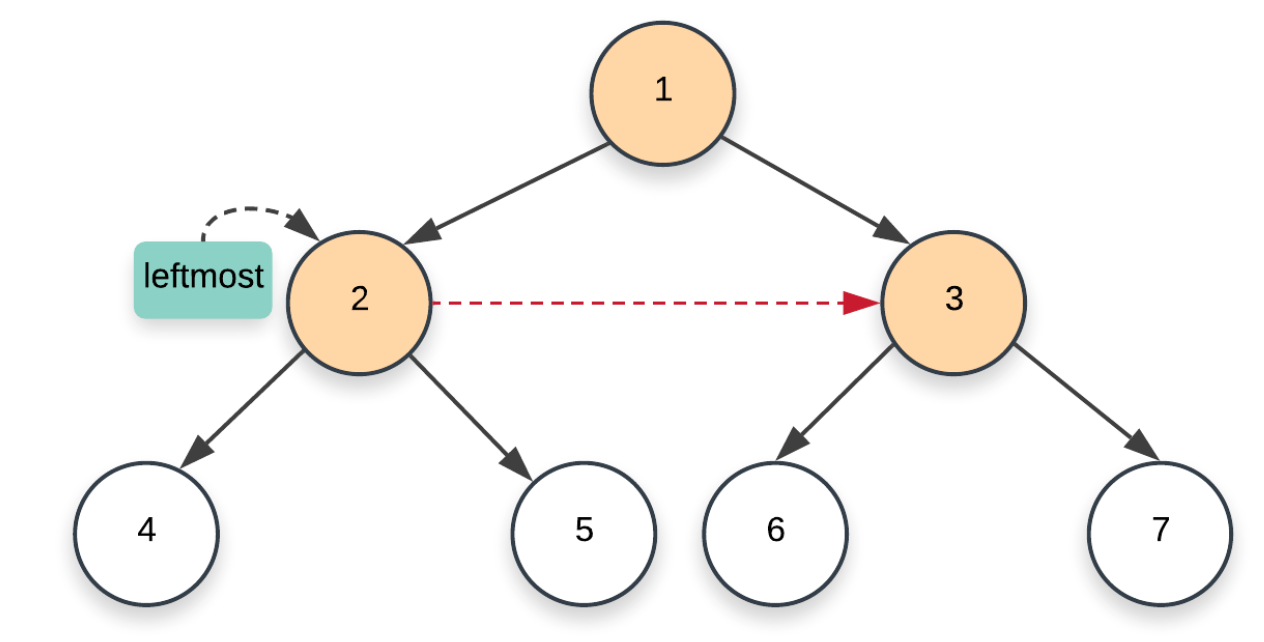

## 117. Populating Next Right Pointers in Each Node II
[117. Populating Next Right Pointers in Each Node II](https://leetcode.com/problems/populating-next-right-pointers-in-each-node-ii/)
- not perfect binary tree

In [24]:
class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if not root:
            return None
        q = deque([root])
        while q:
            size = len(q)
            for i in range(size):
                cur = q.popleft()
                # next pointer point to next right node
                if i < size - 1:
                    cur.next = q[0]
                if cur.left:
                    q.append(cur.left)
                if cur.right:
                    q.append(cur.right)
        return root
        

## 98. Validate Binary Search Tree
[98. Validate Binary Search Tree](https://leetcode.com/problems/validate-binary-search-tree/)
- O(1) space

In [27]:
# Solution 1: recursion with min/max boundry
class Solution:
    def isValidBST(self, root) -> bool:
        if not root:
            return True
        return self.isBST(root, float('-inf'), float('inf'))
    
    def isBST(self, root, minimum, maximum):
        # base case
        if root is None:
            return True
        # current level: val should be unique
        if root.val >= maximum or root.val <= minimum:
            return False
        # recursivly check left and right subtree
        left = self.isBST(root.left, minimum, root.val)
        right = self.isBST(root.right, root.val, maximum)
        
        # report the result to parent
        return left and right

In [29]:
# Solution 2: iterativly inorder traversal (non-decreasing order)
class Solution:
    def isValidBST(self, root) -> bool:
        """
        Inorder iterativly traversal
        compare the cur.val and prev.val
        """
        if root is None:
            return True
        stack = deque()
        self.pushleft(root, stack)
        prev = None
        while stack:
            cur = stack.pop()
            # comapre cur and prev
            if prev and prev.val >= cur.val:
                return False
            prev = cur
            # push right
            self.pushleft(cur.right, stack)
        return True
            
    def pushleft(self, root, stack):
        while root:
            stack.append(root)
            root = root.left
    

## 314. Binary Tree Vertical Order Traversal
[314. Binary Tree Vertical Order Traversal](https://leetcode.com/problems/binary-tree-vertical-order-traversal/)

In [ ]:
class Solution:
    def verticalOrder(self, root):
        if not root:
            return []
        # initial state: use a dict{key = index, val = []} to collect all the nodes with the same vertival index
        q = deque([(root, 0)])
        vertical = defaultdict(list)
        vertical[0].append(root.val)
        while q:
            cur, index = q.popleft()
            if cur.left:
                q.append((cur.left, index - 1))
                vertical[index - 1].append(cur.left.val)
            if cur.right:
                q.append((cur.right, index + 1))
                vertical[index + 1].append(cur.right.val)
        # post processing: return list of list by keys
        return [vertical[x] for x in sorted(vertical.keys())]

## 105. Construct Binary Tree from Preorder and Inorder Traversal
[105. Construct Binary Tree from Preorder and Inorder Traversal](https://leetcode.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal/)

In [32]:
class Solution:
    """
    pre: [3,9,20,15,7]
          R l  r
    in:  [9,3,15,20,7]
            R
         [9]  [15 20 7]
          l       r
    Time: O(n)
    Space: O(n)
    """
    def buildTree(self, preorder, inorder):
        n = len(preorder)
        if n == 1:
            return TreeNode(preorder[0])
        return self.helper(preorder, 0, n - 1, inorder, 0, n - 1)
        
    def helper(self, preorder, preL, preR, inorder, inL, inR):
        # base case
        if preL > preR:
            return None
        
        # current
        root_val = preorder[preL]
        # find the root index in inorder list
        root_idx = inorder.index(root_val)
        left_size = root_idx - inL
        
        root = TreeNode(root_val)
        root.left = self.helper(preorder, preL + 1, preL + left_size,
                           inorder, inL, root_idx - 1)
        root.right = self.helper(preorder, preL + left_size + 1, preR,
                           inorder, root_idx + 1, inR)
        
        return root

## 297. Serialize and Deserialize Binary Tree
[297. Serialize and Deserialize Binary Tree](https://leetcode.com/problems/serialize-and-deserialize-binary-tree/)

In [5]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    """
    Pre-order traversal
    [1, 2, N, N, 3, 4, N, N, 5, N, N]
    
    O(n)
    O(n)
    """
    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        res = []
        def dfs(root):
            # base case
            if not root:
                res.append("N")
                return
            
            # pre-order
            res.append(str(root.val))
            dfs(root.left)
            dfs(root.right)
            
        # call dfs
        dfs(root)
        return ",".join(res)
            
        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        vals = data.split(",")
        self.i = 0
        
        def dfs():
            # base case
            if vals[self.i] == 'N':
                self.i += 1
                return None
            node = TreeNode(int(vals[self.i]))
            self.i += 1
            node.left = dfs()
            node.right = dfs()
            return node
        return dfs()

## 449. Serialize and Deserialize BST
[449. Serialize and Deserialize BST](https://leetcode.com/problems/serialize-and-deserialize-bst/)

- Solution 1: exactly same as Binary Tree

- Solution 2: make use of the feature of BST
    - Add upper and lower bound when calling recursion

In [9]:
# Solution 2
class Codec:

    def serialize(self, root) -> str:
        """Encodes a tree to a single string.
        """
        res = []
        def pre_order(node):
            # base case
            if not node:
                return
            res.append(str(node.val))
            pre_order(node.left)
            pre_order(node.right)
        
        pre_order(root)
        return ",".join(res)
        

    def deserialize(self, data: str):
        """Decodes your encoded data to tree.
        """
        if not data:
            return None
        
        vals = [int(d) for d in data.split(",")]
        
        def dfs(vals, minimum, maximum):
            # base case
            if not vals:
                return None
            if not minimum < vals[0] < maximum:
                return None
            # get the first value
            cur = vals.pop(0)
            root = TreeNode(cur)
            
            root.left = dfs(vals, minimum, cur)
            root.right = dfs(vals, cur, maximum)
            
            return root
        
        return dfs(vals, float('-inf'), float('inf'))

## 428. Serialize and Deserialize N-ary Tree
[428. Serialize and Deserialize N-ary Tree](https://leetcode.com/problems/serialize-and-deserialize-n-ary-tree/)

In [10]:
class Codec:
    def serialize(self, root: 'Node') -> str:
        """Encodes a tree to a single string.
        
        :type root: Node
        :rtype: str
        """
        res = []
        def dfs(node):
            # not enter since for-loop
            # if not node:
            #     res.append("N")
            #     return
            # pre-order
            
            if not node:
                return
            res.append(str(node.val))
            
            for child in node.children:
                dfs(child)
            res.append("N")
        
        dfs(root)
        return ",".join(res)
                
        
	
    def deserialize(self, data: str) -> 'Node':
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: Node
        """
        if not data:
            return None
        
        vals = data.split(",")
        # print(vals)
        root = Node(int(vals.pop(0)), [])
        
        def dfs(node):
            # base case
            if not vals:
                return
            
            while vals[0] != "N":
                # has child
                child = Node(int(vals.pop(0)), [])
                node.children.append(child)
                dfs(child)
            vals.pop(0) # discard "N"
        
        dfs(root)
        return root

## 173. Binary Search Tree Iterator
[173. Binary Search Tree Iterator](https://leetcode.com/problems/binary-search-tree-iterator/)

In [12]:
class BSTIterator:
    def __init__(self, root):
        self.stack = deque()
        self.pushleft(root)
    
    def pushleft(self, root):
        while root:
            self.stack.append(root)
            root = root.left
        

    # Time: amortized (average) time complexity for this function would still be O(1)
    def next(self) -> int:
        node = self.stack.pop()
        # go to right
        self.pushleft(node.right)
        return node.val
        

    # Time: O(1)
    def hasNext(self) -> bool:
        if len(self.stack) > 0:
            return True
        return False


## 94. Binary Tree Inorder Traversal
[94. Binary Tree Inorder Traversal](https://leetcode.com/problems/binary-tree-inorder-traversal/)

In [15]:
class Solution:
    def inorderTraversal(self, root):
        """
            1. initial:
                push the left nodes all the way down to the leaf： pushleft()
            2. visit: root
            3. push right subtree's left nodes all the way down to the leaf: pushleft()
        """
        if root is None:
            return []
        from collections import deque
        res = []
        self.stack =  deque()
        self.pushleft(root)
        while self.stack:
            cur = self.stack.pop()
            res.append(cur.val)
            # push the right subtree
            self.pushleft(cur.right)
        return res
    
    def pushleft(self, root):
        while root:
            self.stack.append(root)
            root = root.left

# === DFS ===

## 200. Number of Islands
[200. Number of Islands](https://leetcode.com/problems/number-of-islands/)

- Time: O(M*N)
- Space: O(M*n)

In [ ]:
# BFS
class Solution:
    def numIslands(self, grid) -> int:
        count = 0
        m = len(grid)
        n = len(grid[0])
        directions = [[0, 1],[1, 0],[0,-1],[-1, 0]]
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '1':
                    grid[i][j] = '0'
                    self.bfs(grid, i, j, directions)
                    count += 1
        return count
    
    def bfs(self, grid, i, j, directions):
        q = deque([[i,j]])
        while q:
            row, col = q.popleft()
            for d in directions:
                r = row + d[0]
                c = col + d[1]
                if r >= 0 and r < len(grid) and c >= 0 and c < len(grid[0]) and grid[r][c] == '1':
                    grid[r][c] = '0'
                    q.append([r, c])

In [ ]:
class Solution:
    def numIslands(self, grid) -> int:
        count = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    self.dfs(grid,i,j)
                    count  += 1
        return count
    
    # use a helper function to flip connected '1's to 0
    def dfs(self,grid,i,j):
        grid[i][j] = 0
        for dr, dc in (1,0), (-1,0), (0,-1), (0,1):
            r = i + dr
            c = j + dc
            if 0 <= r < len(grid) and 0 <= c < len(grid[0]) and grid[r][c]=='1':
                self.dfs(grid,r,c)

## 694. Number of Distinct Islands
[694. Number of Distinct Islands](https://leetcode.com/problems/number-of-distinct-islands/)
- LC的find all island题目。但是一点一点的变复杂。每个岛有颜色。Red，blue, red etc. 先是找出有几个岛，然后找出有几个unique island（颜色跟形状）

In [6]:
class Solution:
    def numDistinctIslands(self, grid) -> int:
        """
        Use dfs
        determine the islands shape by recording the path in DFS
        directions:
            up: (-1, 0, "U") 
            down: (1, 0, "D")
            left: (0, -1, "L")
            right: (0, 1, "R")
            start: "X"
            out of bound OR water: "O"
        
        Time: O(m*n)
        Space: O(m*n) whole grid is a island
        
        """
        m = len(grid)
        n = len(grid[0])
        res = set()
        directions = [(-1, 0,"U") ,(1, 0,"D"),(0, -1,"L"),(0, 1,"R")]
        
        # traverse the grid
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    path = self.dfs(grid, i, j, m, n, directions)
                    # print(path)
                    res.add("X" + path)
                    # res.add(path)
        return len(res)
    
    def dfs(self, grid, i, j, m, n, directions):
        # set island to water (deduplication)
        grid[i][j] = 0
        
        # start point
        path = []
        # call dfs for 4 directions
        for dr, dc, p in directions:
            r = i + dr
            c = j + dc
            path.append(p)
            
            # out of range or water: add "O"
            if r < 0 or r >= m or c < 0 or c >= n or grid[r][c] == 0:
                path.append("O")
            else:
                path.append(self.dfs(grid, r, c, m, n, directions))
        return "".join(path)

## 78. Subsets
[78. Subsets](https://leetcode.com/problems/subsets/)

In [9]:
class Solution:
    # Time: O(N * 2^N)
    # Space: O(N * 2^N)
    def subsets(self, nums):
        res = []
        oneRes = []
        self.helper(nums, oneRes, res, 0)
        return res
    
    def helper(self, nums, oneRes, res, index):
        if index == len(nums):
            res.append(copy.deepcopy(oneRes))
            return
        # add
        oneRes.append(nums[index])
        self.helper(nums, oneRes, res, index + 1)
        oneRes.pop()
        # not add
        self.helper(nums, oneRes, res, index + 1)

## 90. Subsets II
[90. Subsets II](https://leetcode.com/problems/subsets-ii/)

In [8]:
class Solution:
    def subsetsWithDup(self, nums):
        res = []
        oneRes = []
        # !!! sort
        nums.sort()
        self.helper(nums, 0, oneRes, res)
        return res
    
    def helper(self, nums, index, oneRes, res):
        if index == len(nums):
            res.append(copy.deepcopy(oneRes))
            return
        # add 
        oneRes.append(nums[index])
        self.helper(nums, index + 1, oneRes, res)
        oneRes.pop()
        
        # not add
        # jump all the same element
        while index < len(nums) - 1 and nums[index] == nums[index + 1]:
            index += 1
        self.helper(nums, index + 1, oneRes, res)

## 46. Permutations
[46. Permutations](https://leetcode.com/problems/permutations/)

In [80]:
class Solution(object):
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        
    positon    index           root
                         /       |     \
        1        0      a bc     b ac   c ba
                        /  \     /  \    / \
        2        1    ab c  ac b
                      |
        3        2   abc
        """
        res = []
        self.helper(nums, 0, res)
        return res
    
    def helper(self, nums, index, res):
        # base case
        if index == len(nums):
            res.append(copy.deepcopy(nums))
            return
        # current level: # branches = # of remaining elements that could be put at the current positon
        for i in range(index, len(nums)):
            nums[i], nums[index] = nums[index], nums[i]
            self.helper(nums, index + 1, res)
            nums[i], nums[index] = nums[index], nums[i]

## 47. Permutations II
[47. Permutations II](https://leetcode.com/problems/permutations-ii/)

In [82]:
class Solution:
    def permuteUnique(self, nums):
        res = []
        self.helper(nums, 0, res)
        return res
    
    def helper(self, nums, index, res):
        # base case
        if index == len(nums):
            res.append(copy.deepcopy(nums))
            return
        
        # hashset deduplicate (same elemmnt only be put once at the current position)
        dedup = set()
        for i in range(index, len(nums)):
            if nums[i] not in dedup:
                nums[i], nums[index] = nums[index], nums[i]
                self.helper(nums, index + 1, res)
                nums[i], nums[index] = nums[index], nums[i]
                dedup.add(nums[i])

## 1274. Number of Ships in a Rectangle
[1274. Number of Ships in a Rectangle](https://leetcode.com/problems/number-of-ships-in-a-rectangle/)

## 79. Word Search
[79. Word Search](https://leetcode.com/problems/word-search/)

## 212. Word Search II
[212. Word Search II](https://leetcode.com/problems/word-search-ii/)

### 给一个目标数字，问从1开始要么*2要么/3如何找到是否可以得到目标数字，propose了backtracking但是实在是没有时间了，问了一下base case,如果不可能找到解什么时候程序停止。问了是BFS还是DFS。如果用DFS怎么实现，如果BFS怎么实现。Return path


## 490. The Maze
[490. The Maze](https://leetcode.com/problems/the-maze/)

-follow up: 汽车中间某个点可以加油这种

## Rat in Maze
[Rat in Maze](https://www.geeksforgeeks.org/rat-in-a-maze-backtracking-2/)
[Rat in Maze](https://leetcode.com/discuss/interview-question/algorithms/124715/amazon-is-cheese-reachable-in-the-maze)

## 797. All Paths From Source to Target
[797. All Paths From Source to Target](https://leetcode.com/problems/all-paths-from-source-to-target/)

In [4]:
class Solution:
    def allPathsSourceTarget(self, graph):
        """
        Adjacency matrix:
        initial: 0
        Backtraking
        
        Time: O(2^N * N)
        Every time we add a new node into the graph, the number of paths would double.
        
        Space: O(N) stack
        
        """
        result = [] 
        if not graph:
            return result 
        
        curRes = [0]
        self.dfs(graph, 0, curRes, result) 
        return result
    
    def dfs(self, graph, cur_node, curRes, result): 
        # terminate condition 
        if cur_node == len(graph) - 1: 
            result.append(copy.deepcopy(curRes)) 
            return 
        
        # find neighbors
        for nei in graph[cur_node]:
            curRes.append(nei)
            self.dfs(graph, nei, curRes, result) 
            curRes.pop()

## Bloomberg | Phone Screen | Find Path b/w 2 objects in a desert
[Bloomberg | Phone Screen | Find Path b/w 2 objects in a desert](https://leetcode.com/discuss/interview-question/1608777/bloomberg-phone-screen-find-path-bw-2-objects-in-a-desert)

[follow-up](https://www.1point3acres.com/bbs/thread-929625-1-1.html )

```
// Implement a ride(desert,gas) method that returns true if a car can reach an oasis before it runs out of gas and false otherwise. The car can drive in four directions: top, bottom, left, right. Moving one field requires one unit of gas (used gas is an equivalent of the number of steps taken).
// The desert is a 2D m x n array with fields:
// 'c' - the starting point of the car
// 'o' - the oasis, our destination
// '.' - sand, the car can drive through it
// an integer value - a gas station, the car can refill once, as many gas units as the value indicates
// const desert = [
//     ['.','.','.','o'],
//     ['.','.','.','.'],
//     ['.','.','.','.'],
//     ['.','c','.','.']
// ];
这一题其实非常简单，直接坐标相减就是答案，但我一开始想复杂了，先是准备用dfs写，讲了思路之后，面试官问我有别的优化不，我又想了想，把dfs转换成带备忘录的dp了……但是面试官没看懂也没听懂我的思路，我解释了将近二十分钟，眼看着时间只剩二十分钟了，我有点着急，问他再不让我写代码就写不完了……他说没事，先讲思路……两分钟后我开始写代码，然后十分钟完成了dp的代码。
```

## 1293. Shortest Path in a Grid with Obstacles Elimination
[1293. Shortest Path in a Grid with Obstacles Elimination](https://leetcode.com/problems/shortest-path-in-a-grid-with-obstacles-elimination/)

In [83]:
class Solution:
    def shortestPath(self, grid, k: int) -> int:
        """
        Node (i, j, cur_k, dis)
        Call BFS
        ！！！！ cur_k should be in the state
        we might visit the same cell but if the k is different, the path and distance are also different!
        """
        m = len(grid)
        n = len(grid[0])
        target = (m - 1, n - 1)
        q = deque([(0, 0, k, 0)])
        visited = set()
        visited.add((0,0,k))
        directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
        while q:
            cur = q.popleft()
            row = cur[0]
            col = cur[1]
            cur_k = cur[2]
            dis = cur[3]
            
            if (row, col) == target:
                return dis
            
            neighbors = self.findNeighbors(grid, m, n, row, col, directions)
            for r, c in neighbors:
                k_eli = cur_k - grid[r][c]
                if k_eli >= 0:
                    if (r, c, k_eli) not in visited:
                        q.append((r, c, k_eli, dis + 1))
                        visited.add((r, c, k_eli))
        return -1
    
    def findNeighbors(self, grid, m, n, row, col, directions):
        neighbors = []
        for dr, dc in directions:
            r = row + dr
            c = col + dc
            if 0 <= r < m and 0 <= c < n:
                neighbors.append((r, c))
        return neighbors

# === DP ===

## 62. Unique Paths
[62. Unique Paths](https://leetcode.com/problems/unique-paths/)

## 63. Unique Paths II
[63. Unique Paths II](https://leetcode.com/problems/unique-paths-ii/)

## 53. Maximum Subarray
[53. Maximum Subarray](https://leetcode.com/problems/maximum-subarray/)

## 322. Coin Change
[322. Coin Change](https://leetcode.com/problems/coin-change/)

## 139. Word Break
[139. Word Break](https://leetcode.com/problems/word-break/)

```
给一个string 和word dict
返回用空格分隔的 valid string（assume 只有一个解）
follow up：返回所有 valid string
```

## 140. Word Break II
[140. Word Break II](https://leetcode.com/problems/word-break-ii/)

## 935. Knight Dialer
[935. Knight Dialer](https://leetcode.com/problems/knight-dialer/)

# === Trie ===

## 642. Design Search Autocomplete System
[642. Design Search Autocomplete System](https://leetcode.com/problems/design-search-autocomplete-system/)

# === Matrix ===

## 73. Set Matrix Zeroes
[73. Set Matrix Zeroes](https://leetcode.com/problems/set-matrix-zeroes/)

- 要求in-place， 空间复杂度要求O(1)

In [86]:
class Solution:
    def setZeroes(self, matrix) -> None:

        m = len(matrix)
        n = len(matrix[0])
		
        first_row_has_zero = False
        first_col_has_zero = False
        
        # iterate through matrix to mark the zero row and cols
        for row in range(m):
            for col in range(n):
                if matrix[row][col] == 0:
                    if row == 0:
                        first_row_has_zero = True
                    if col == 0:
                        first_col_has_zero = True
                    matrix[row][0] = matrix[0][col] = 0
    
        # iterate through matrix to update the cell to be zero if it's in a zero row or col
        for row in range(1, m):
            for col in range(1, n):
                matrix[row][col] = 0 if matrix[0][col] == 0 or matrix[row][0] == 0 else matrix[row][col]
        
        # update the first row and col if they're zero
        if first_row_has_zero:
            for col in range(n):
                matrix[0][col] = 0
        
        if first_col_has_zero:
            for row in range(m):
                matrix[row][0] = 0

## 1583. Count Unhappy Friends
[1583. Count Unhappy Friends](https://leetcode.com/problems/count-unhappy-friends/)

https://www.1point3acres.com/bbs/thread-891136-1-1.html

https://www.1point3acres.com/bbs/thread-905390-1-1.html

5.1 - 7.30(done)

https://www.1point3acres.com/bbs/thread-921835-1-1.html

8.1 - 8.23(done)

8.24 - 8.31(done)

9.1 - 9.9 (done)

9.10 - 9.16(done)

https://www.1point3acres.com/bbs/thread-928859-2-1.html

https://www.1point3acres.com/bbs/thread-924473-1-1.html
